In [ ]:
# 현대제철에서 제공해준 데이터만으로 결로를 예측해보자

#plant1_traincp

#plant_test

In [3]:
import pandas as pd
from numpy import mean
from scipy import stats #scipy란 과학기술 통계분석함수 모음이다.
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False
import mglearn 
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Dense,Activation,LSTM,Dropout
from keras.optimizers import Adam
from IPython .display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils
from numpy import argmax


Using TensorFlow backend.


In [4]:
plant1_train=pd.read_csv('C:/Anaconda3/python/csvdata/hyundae/plant1_traincp.csv')
plant_test=pd.read_csv('C:/Anaconda3/python/csvdata/hyundae/plant_testcp.csv')

In [5]:
plant1_train=plant1_train.iloc[0:,1:]
plant_test=plant_test.iloc[0:,1:]


In [6]:
plant1_train

,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
0,2016-04-01 0:00,16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0
1,2016-04-01 3:00,14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0
2,2016-04-01 6:00,13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0
3,2016-04-01 9:00,13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0
4,2016-04-01 12:00,16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58744,2019-03-31 23:10,10.52,36.39,10.52,10.55,35.20,11.17,9.85,37.88,9.79,6.40,43.86,0.0,0.0,0.0
58745,2019-03-31 23:20,10.52,37.09,10.44,10.55,35.53,11.09,9.88,38.40,9.72,6.34,44.02,0.0,0.0,0.0
58746,2019-03-31 23:30,10.43,37.18,10.56,10.49,35.65,11.21,9.85,38.22,9.91,6.40,43.04,0.0,0.0,0.0
58747,2019-03-31 23:40,10.49,38.00,10.56,10.55,36.08,11.21,9.82,38.95,9.83,6.31,45.33,0.0,0.0,0.0


In [7]:
plant_test

,mea_ddhr,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,x24h_tma,Unnamed: 10,x48h_tma
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30
3,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00
4,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30
...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 3:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 3:00,NaN,2020-03-31 3:00
3535,2020-03-29 5:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 5:00,NaN,2020-03-31 5:00
3536,2020-03-29 7:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 7:00,NaN,2020-03-31 7:00
3537,2020-03-29 11:30,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30,NaN,2020-03-31 11:30


In [8]:
#plant1다운시 앞의 컬럼이 붙어버림 제거해준다.
plant1_train.columns=plant1_train.columns.str.replace('plant1_train.','')
plant1_train

,mea_ddhr,tem_in_loc1,hum_in_loc1,tem_coil_loc1,tem_in_loc2,hum_in_loc2,tem_coil_loc2,tem_in_loc3,hum_in_loc3,tem_coil_loc3,tem_out_loc1,hum_out_loc1,cond_loc1,cond_loc2,cond_loc3
0,2016-04-01 0:00,16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0
1,2016-04-01 3:00,14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0
2,2016-04-01 6:00,13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0
3,2016-04-01 9:00,13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0
4,2016-04-01 12:00,16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58744,2019-03-31 23:10,10.52,36.39,10.52,10.55,35.20,11.17,9.85,37.88,9.79,6.40,43.86,0.0,0.0,0.0
58745,2019-03-31 23:20,10.52,37.09,10.44,10.55,35.53,11.09,9.88,38.40,9.72,6.34,44.02,0.0,0.0,0.0
58746,2019-03-31 23:30,10.43,37.18,10.56,10.49,35.65,11.21,9.85,38.22,9.91,6.40,43.04,0.0,0.0,0.0
58747,2019-03-31 23:40,10.49,38.00,10.56,10.55,36.08,11.21,9.82,38.95,9.83,6.31,45.33,0.0,0.0,0.0


In [9]:
#시간부분이 object이므로 datetime으로 변환해준다.
plant1_train['mea_ddhr'] = pd.to_datetime(plant1_train['mea_ddhr'], format='%Y-%m-%d %H:%M:%S', errors='raise')
plant_test['mea_ddhr'] = pd.to_datetime(plant_test['mea_ddhr'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [10]:
#회귀 분석모델을 만들어보자 일단 위치1의 temp,hum과 제철의 표면온도만 분석해보자
plant1=plant1_train[['mea_ddhr','tem_in_loc1','hum_in_loc1','tem_coil_loc1','cond_loc1']]
plant1


,mea_ddhr,tem_in_loc1,hum_in_loc1,tem_coil_loc1,cond_loc1
0,2016-04-01 00:00:00,16.00,24.00,11.00,0.0
1,2016-04-01 03:00:00,14.00,28.00,10.00,0.0
2,2016-04-01 06:00:00,13.00,33.00,10.00,0.0
3,2016-04-01 09:00:00,13.00,33.00,10.00,0.0
4,2016-04-01 12:00:00,16.00,28.00,10.00,0.0
...,...,...,...,...,...
58744,2019-03-31 23:10:00,10.52,36.39,10.52,0.0
58745,2019-03-31 23:20:00,10.52,37.09,10.44,0.0
58746,2019-03-31 23:30:00,10.43,37.18,10.56,0.0
58747,2019-03-31 23:40:00,10.49,38.00,10.56,0.0


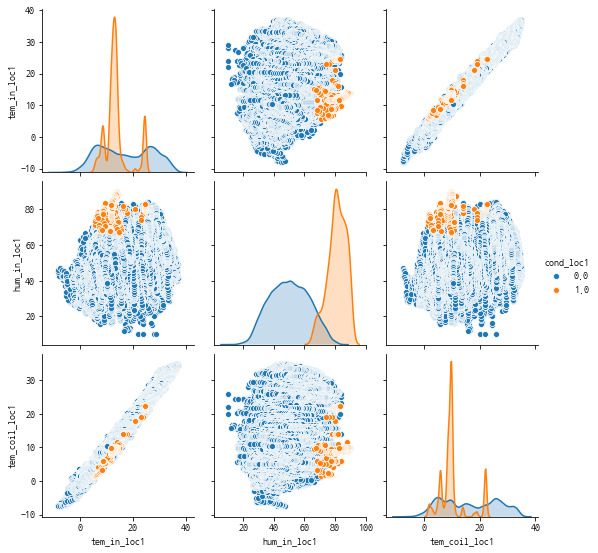

In [11]:
# 온도,습도,코일 표면온도와 결로현상의 상관관계 시각화(seaborn 사용)
sns.pairplot(plant1[['tem_in_loc1','hum_in_loc1','tem_coil_loc1','cond_loc1']], hue="cond_loc1")
plt.show()

In [12]:
plant1=plant1.dropna(axis=0)
plant1

,mea_ddhr,tem_in_loc1,hum_in_loc1,tem_coil_loc1,cond_loc1
0,2016-04-01 00:00:00,16.00,24.00,11.00,0.0
1,2016-04-01 03:00:00,14.00,28.00,10.00,0.0
2,2016-04-01 06:00:00,13.00,33.00,10.00,0.0
3,2016-04-01 09:00:00,13.00,33.00,10.00,0.0
4,2016-04-01 12:00:00,16.00,28.00,10.00,0.0
...,...,...,...,...,...
58744,2019-03-31 23:10:00,10.52,36.39,10.52,0.0
58745,2019-03-31 23:20:00,10.52,37.09,10.44,0.0
58746,2019-03-31 23:30:00,10.43,37.18,10.56,0.0
58747,2019-03-31 23:40:00,10.49,38.00,10.56,0.0


In [13]:
plant1['tem_in_loc1'] = plant1['tem_in_loc1'].astype('float')
plant1['hum_in_loc1'] = plant1['hum_in_loc1'].astype('float')
plant1['tem_coil_loc1'] = plant1['tem_coil_loc1'].astype('float')
plant1['cond_loc1'] = plant1['cond_loc1'].astype('float')
x1=plant1.values[:,1:4]
y1=plant1.values[:,[4]]

In [14]:
x1=x1.astype('float')

In [15]:
y1=y1.astype('float')

In [16]:
y1=np.squeeze(y1, axis=1)

In [17]:
#우선 간단하게 svm 머신러닝으로 분석해보자

In [18]:
#만든 svc 모델로 간단하게 예측해보자 (입력 특성 tem,hum,tem_coil)
from sklearn.svm import SVC
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix

In [19]:
X_train, X_test, y_train, y_test =train_test_split(x1, y1, random_state=0)

In [20]:
svc = SVC().fit(X_train, y_train)

In [21]:
print('훈련세트점수: {:.3f}'.format(svc.score(X_train, y_train)))
print('검증세트점수: {:.3f}'.format(svc.score(X_test, y_test)))

훈련세트점수: 0.997
검증세트점수: 0.999


In [22]:
y_pred = svc.predict(X_test)
# 예측값 y_pred와 실제값 y_test의 결과가 얼마나 일치하는지 시각화해서 확인해보자
print(metrics.classification_report(y_pred,y_test))
y_test[y_test==1].shape #결로 발생 55개
confusion_matrix(y_test, y_pred)

###결과분석
#56%의 확률로 결로현상을 구별하였다.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14432
         1.0       0.65      0.95      0.77        38

    accuracy                           1.00     14470
   macro avg       0.83      0.97      0.89     14470
weighted avg       1.00      1.00      1.00     14470



array([[14413,     2],
       [   19,    36]], dtype=int64)

In [23]:
X_test.shape,y_pred.shape


((14470, 3), (14470,))

#### 이제 딥러닝에 사용할 데이터의 차원을 적절히 정해준다.

In [26]:
#차원확장 y1=(y1[:, np.newaxis])
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=7)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((46303, 3), (11576, 3), (46303,), (11576,))

In [27]:
X_train

array([[26.  , 64.  , 25.  ],
       [11.01, 65.38,  9.41],
       [27.74, 40.72, 25.09],
       ...,
       [15.98, 49.69, 14.03],
       [ 1.58, 39.53, -0.93],
       [ 7.41, 63.28,  5.29]])

In [28]:
y1

array([0., 0., 0., ..., 0., 0., 0.])

In [1]:
# step 3. 모델생성
# model = Sequential()
# model.add(Dense(1, input_dim=3, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
# model.summary()

# 모델2
# model = Sequential()
# model.add(Dense(3, activation='relu', input_shape=(3,)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=4, batch_size=512)
# results = model.evaluate(X_test, y_test)


# # 모델3(1일 확률 데이터)
# model = Sequential()
# model.add(Dense(3, activation='relu', input_shape=(3,)))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


# 모델4
# model = Sequential()
# model.add(Dense(16, input_shape=(3,), activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()


model = Sequential()
model.add(Dense(16,input_dim=3, activation='sigmoid'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

NameError: name 'Sequential' is not defined

In [2]:
#step 5. 모델학습
hist= model.fit(X_train,y_train,epochs=10,verbose=1)

NameError: name 'model' is not defined

In [111]:
# step6. 모델평가
scores= model.evaluate(X_test,y_test)
print('%s : %.2f%%' %(model.metrics_names[1],scores[1]*100))

11576/11576 [==============================] - 0s 14us/step
accuracy : 99.80%


In [112]:
X_test.shape,y_test.shape

((11576, 3), (11576,))

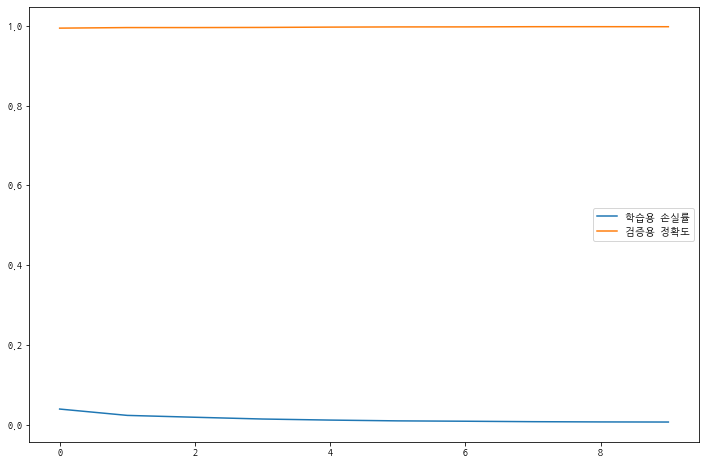

In [113]:
# setp 5. 시각화
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 학습용 데이터셋의 손실율
plt.plot(hist.history['accuracy']) # 학습용 데이터셋의 정확도
plt.legend(['학습용 손실률', '검증용 정확도'])
plt.show()

In [114]:
plant1yes=plant1[plant1['cond_loc1']==1]
plant1no=plant1[plant1['cond_loc1']==0]
plant1yesval=plant1yes.iloc[:,1:].values
plant1noval=plant1no.iloc[:,1:].values

In [127]:
plant1noval
plant1yesval

array([[18.0, 78.0, 14.0, 1.0, <class 'list'>],
       [17.0, 80.0, 14.0, 1.0, <class 'list'>],
       [21.0, 80.0, 18.0, 1.0, <class 'list'>],
       ...,
       [8.87, 78.91, 5.94, 1.0, <class 'list'>],
       [8.84, 78.21, 5.9, 1.0, <class 'list'>],
       [8.81, 77.5, 5.86, 1.0, <class 'list'>]], dtype=object)

In [116]:
#plant1의 실제 결로발생일때의 데이터로 예측확률을 확인해보자
yes1=np.array([18.00,78.00,14.00]).reshape(1,3)
yes2=np.array([24.00,78.00,19.00]).reshape(1,3)
yes3=np.array([9.05,80.34,5.98]).reshape(1,3)
yes4=np.array([8.81,77.5,5.86]).reshape(1,3)
no1=np.array([10.49,38.00,10.56]).reshape(1,3)
no2=np.array([10.43,37.18,10.56]).reshape(1,3)
no3=np.array([10.49,36.39,10.52]).reshape(1,3)
no4=np.array([10.49,38.74,10.52]).reshape(1,3)


print('yes1',model.predict(yes1))
print('yes2',model.predict(yes2))
print('yes3',model.predict(yes3))
print('yes4',model.predict(yes4))
print('no1',model.predict(no1))
print('no2',model.predict(no2))
print('no3',model.predict(no3))
print('no4',model.predict(no4))
#0만 넘으면 발생이라고 보면될듯

yes1 [[0.40639746]]
yes2 [[0.60654515]]
yes3 [[0.6928519]]
yes4 [[0.5352335]]
no1 [[4.8226383e-07]]
no2 [[3.9965602e-07]]
no3 [[3.806597e-07]]
no4 [[5.633838e-07]]


In [117]:
model.predict(plant1.values[0,1:4].reshape(1,3))

array([[2.2711995e-06]], dtype=float32)

In [118]:
plant1.shape[0]

57879

In [119]:
plant1_cond1=plant1[plant1['cond_loc1']==1]

In [120]:
# plant1에 추가 컬럼으로 해당 확률을 입력해보자
# 한번에 하면 시간이 오래걸리니 끊어서 할것
list3=[]
for i in range(plant1_cond1.shape[0]):
    list3.append(model.predict(plant1_cond1.values[i,1:4].reshape(1,3))[0][0])
    print(model.predict(plant1_cond1.values[i,1:4].reshape(1,3))[0][0])
    

0.40639746
0.2612732
0.2987099
0.2987099
0.60654515
0.38474515
0.31846303
0.45612076
0.78604585
0.3263094
0.92077184
0.96628153
0.97949255
0.9806121
0.98635525
0.9846311
0.9840419
0.9790411
0.96970135
0.92432827
0.6295245
0.7901651
0.8421728
0.91250587
0.7154934
0.86646533
0.884592
0.8391447
0.80285215
0.6891089
0.71711916
0.41308743
0.5469391
0.63023376
0.702835
0.767735
0.35780415
0.537292
0.63156766
0.6595758
0.74709064
0.7830503
0.7505167
0.7634484
0.6941076
0.6945756
0.70515907
0.5534416
0.7505769
0.76710963
0.73687327
0.909873
0.8779196
0.9116133
0.92071027
0.93302995
0.9004839
0.87507993
0.83291405
0.75261515
0.7617913
0.77797866
0.76887566
0.7897037
0.81424403
0.804357
0.56367755
0.37608653
0.4195944
0.30935594
0.3829695
0.40354046
0.38173962
0.31965747
0.31342664
0.17174184
0.17105475
0.18026145
0.17294614
0.54236984
0.57574105
0.55757177
0.48038226
0.4188325
0.4376106
0.39197293
0.41357794
0.40266982
0.3123594
0.3194717
0.32735768
0.31705618
0.31754467
0.300997
0.30351216
0.3

In [128]:
sorted(list3)

[0.17105475,
 0.17174184,
 0.17294614,
 0.18026145,
 0.2612732,
 0.28308317,
 0.28628552,
 0.29031855,
 0.29726925,
 0.2987099,
 0.2987099,
 0.29887378,
 0.300997,
 0.30142877,
 0.301701,
 0.30195493,
 0.30249655,
 0.30351216,
 0.30534348,
 0.30539632,
 0.30539632,
 0.30599743,
 0.30935594,
 0.3117996,
 0.3123594,
 0.31286126,
 0.31342664,
 0.31486163,
 0.31595427,
 0.31705618,
 0.31754467,
 0.31795672,
 0.31846303,
 0.3194717,
 0.31965747,
 0.32008937,
 0.3227713,
 0.3263094,
 0.32735768,
 0.32794085,
 0.3284708,
 0.33019963,
 0.33517408,
 0.33666041,
 0.35780415,
 0.37608653,
 0.38173962,
 0.3829695,
 0.38474515,
 0.39197293,
 0.40266982,
 0.40354046,
 0.40639746,
 0.41308743,
 0.41357794,
 0.4188325,
 0.4195944,
 0.4376106,
 0.45612076,
 0.48038226,
 0.4996796,
 0.5117727,
 0.5352335,
 0.537292,
 0.5382559,
 0.54236984,
 0.5463381,
 0.5469391,
 0.5534416,
 0.55757177,
 0.561572,
 0.56367755,
 0.5657212,
 0.57574105,
 0.57920474,
 0.58657914,
 0.589726,
 0.5936025,
 0.60295016,
 0.60

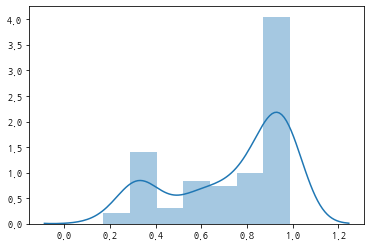

In [131]:
#결로발생시의 각 데이터별 결로발생확률값 분포도
sns.distplot(list3) 
stats.probplot(list3)
plt.show()